In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for plotting 
from sklearn.model_selection import train_test_split #For splitting the dataset
from sklearn import svm
from sklearn.metrics import accuracy_score

# Collecting and processing The Data

In [42]:
#Loading the dataset 
df_loan = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [43]:
#printing the first 3 rows of the dataframe
df_loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
#Rows and Columns 
df_loan.shape

(614, 13)

In [45]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [46]:
#Printing all the columns and the number of missing values
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
#dropping the missing values
df_loan = df_loan.dropna()

In [48]:
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [49]:
#Replacing the y with 1 and the n with 0 in Loan_Status
# label encoding
df_loan.replace({'Loan_Status':{'N':0,'Y':1}}, inplace=True)

In [51]:
#printing the first 5 rows of the dataframe
df_loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [52]:
#Dependents column value
df_loan["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [53]:
#Replacing the 3+ with 4
df_loan = df_loan.replace(to_replace='3+',value=4)

In [54]:
df_loan['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

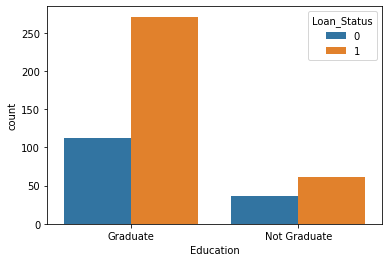

In [55]:
#education and loan status 
sns.countplot(x='Education',hue='Loan_Status',data=df_loan)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

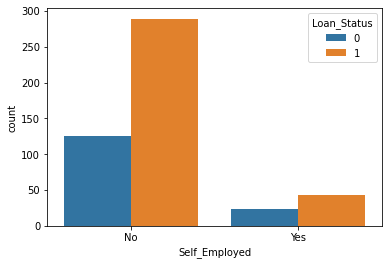

In [56]:
# Self_Employed and Loan Status

sns.countplot(x='Self_Employed',hue='Loan_Status',data=df_loan)

<AxesSubplot:xlabel='Gender', ylabel='count'>

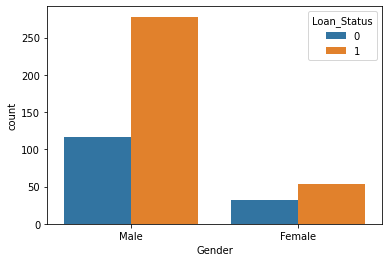

In [57]:
# Gender and Loan Status
sns.countplot(x='Gender',hue='Loan_Status', data=df_loan)

<AxesSubplot:xlabel='Married', ylabel='count'>

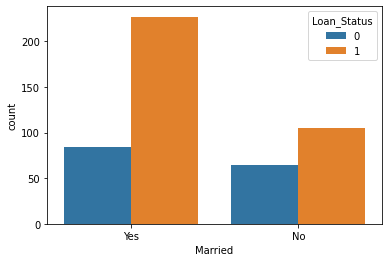

In [58]:
sns.countplot(x='Married',hue='Loan_Status',data=df_loan)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

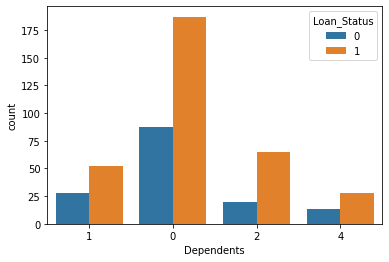

In [59]:
# Dependents and Loan Status

sns.countplot(x='Dependents',hue='Loan_Status', data=df_loan)

In [23]:
#converting catogorical values to numerical values
df_loan.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [24]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [26]:
# separating the data and label
A = df_loan.drop(columns=['Loan_ID','Loan_Status'],axis=1)
B = df_loan['Loan_Status']

In [27]:
print(A)
print(B)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

# Splitting the dataset to train and test

In [28]:
A_train, A_test,B_train,B_test = train_test_split(A,B,test_size=0.1,stratify=B,random_state=2)

In [29]:
print(A.shape, A_train.shape, A_test.shape)

(480, 11) (432, 11) (48, 11)


# Support Vector Machine Model

In [30]:
classifier = svm.SVC(kernel='linear')

In [31]:
#training the support Vector Macine model
classifier.fit(A_train,B_train)

SVC(kernel='linear')

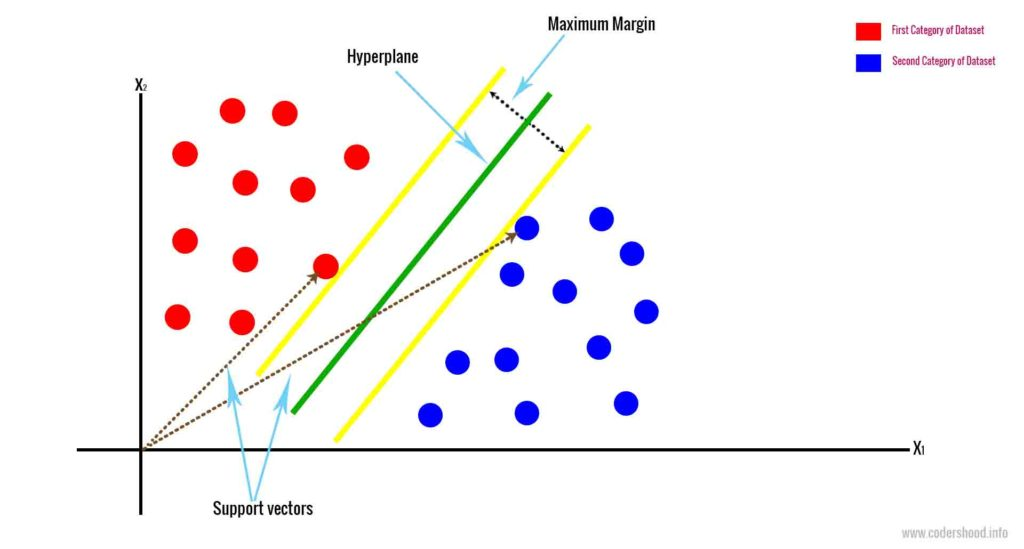# 

# Evaluating the model

In [32]:
# accuracy score on test data
A_test_prediction = classifier.predict(A_test)
test_data_accuray = accuracy_score(A_test_prediction,B_test)

In [33]:
print('Accuracy of the test data : ', test_data_accuray)

Accuracy of the test data :  0.8333333333333334


In [34]:
# accuracy score on training data
A_train_prediction = classifier.predict(A_train)
training_data_accuray = accuracy_score(A_train_prediction,B_train)

In [35]:
print('Accuracy of the training data : ', training_data_accuray)

Accuracy of the training data :  0.7986111111111112


# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
log_regre = LogisticRegression()

In [63]:
# training the model

log_regre.fit(A_train, B_train)

C:\Users\malsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
log_B_train_pred = log_regre.predict(A_train)

In [65]:
accuracy_score(log_B_train_pred, B_train)

0.8009259259259259

In [66]:
log_B_test_pred = log_regre.predict(A_test)
accuracy_score(log_B_test_pred, B_test)

0.8333333333333334

# predictive system

In [69]:
input_data = (1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2)

input_data_as_numpy_array = np.asarray(input_data) # changing the input_data to numpy array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) # reshape the array 

pred = classifier.predict(input_data_reshaped)
print(pred)

if (pred[0] == 0):
    print('The person is not eligible for loan')
else:
    print('\nThe person is eligible for loan')

[1]

The person is eligible for loan


C:\Users\malsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# KNeighborsClassifier

In [70]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# define the model
knClassifier = KNeighborsClassifier()
# fit the model
knClassifier.fit(A_train,B_train)
knClassifier.score(A_test,B_test)
#score = accuracy_score(y_test,y_pred)
#score

0.6666666666666666

In [71]:
y_pred = knClassifier.predict(A_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1], dtype=int64)